## Business Understanding

## Probem Statement
In this notebook, I will be using an approved dataset to predict the heart diseases.
Using this dataset, we will create the following models to the data:

1) Logistic Regression

2) Decision Tree

3) Random Forest Classifier

4) KNN Algorithm

5) ADA Boost

6) Gradient Boost Classifier

Later, we will compare the results of the performance metrics- accuracy, precision, recall and f1 of the above methods and decide which model best fits our dataset.

## Business Problem
From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem.
How can we build an intelligent model that can predict if the person tests positive or negative to the heart disease based on the dependent variables/features?



## Setting up the development environment:

### Importing Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## To discuss about the Data Source
### About the dataset:

### 1) Source:
This is a dataset generated based on a study published by Kaggle:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Features of the dataset:
In this dataset, there are 13 features related to the development of heart disease and one target column that indicates whether a person is afflicted or not. There are also 1025 entries.
Heart disease target Variable : Binary (Dependent Variable)

The Features are:

Age

Sex

Chest pain type (4 values)

Resting blood pressure

Serum cholestoral in mg/dl

Fasting blood sugar > 120 mg/dl

Resting electrocardiographic results (values 0,1,2)

Maximum heart rate achieved

Exercise induced angina

Oldpeak = ST depression induced by exercise relative to rest

The slope of the peak exercise ST segment

Number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


### 2) Limitation:
A limitation of this dataset is that it is small.

## Read the data and inspect:

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Dataset Importing and Analysis(EDA)</p>


In [2]:
df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#Dimension about the dataset
df.shape

(1025, 14)

In [4]:
#Dimension about the datatypes and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#As we can see from above, there are no missing values. 

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Counting the no of Values in the Target
heart = df.target.value_counts()
heart

1    526
0    499
Name: target, dtype: int64

In [7]:
#Correlation Analysis:
print(df.corr(method='pearson'))

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

## Data Vizualization for the Project:

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Data Visualization</p>


****Count of people based on the target****

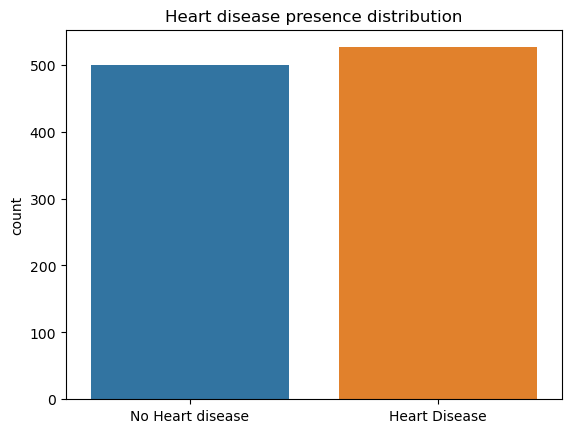

In [8]:
f = sns.countplot(x='target', data=df)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");


In this data, there are 500 rows of people withHeart disease and 450 rows of people without disease

In [ ]:
#Making a new seperate dataframe for diseased people

In [9]:
disease = (df[df['target'] == 1])
non_disease = (df[df['target'] == 0])

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of Age by presence of Target</p>


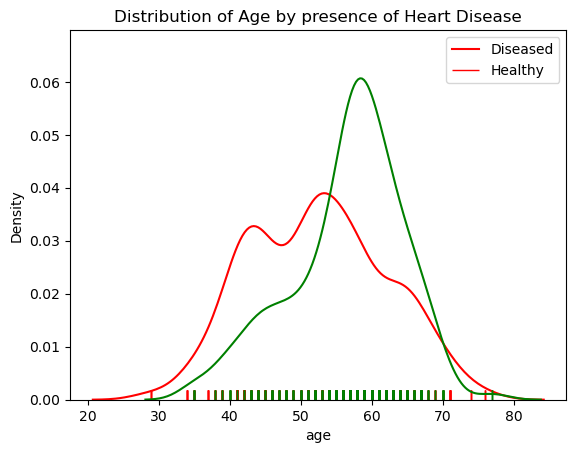

In [10]:
sns.distplot(disease[['age']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['age']], hist=False, color='green', rug=True)
plt.xlabel('age')
plt.title('Distribution of Age by presence of Heart Disease')
plt.legend(['Diseased', 'Healthy'])
plt.show()

People with heart disease have a lower density in the age group of 40-70, which makes sense as older people have a lower risk of heart disease. And the age group of 50-70 are more healthy.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of Chol by presence of Target</p>


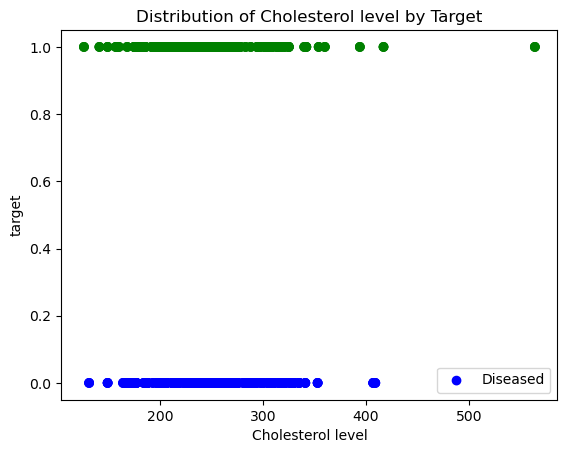

In [11]:
fig, ax = plt.subplots()

colors = {1:'green', 0:'blue'}


ax.scatter(df['chol'], df['target'], c=df['target'].map(colors))
plt.legend(['Diseased'])
plt.xlabel('Cholesterol level')
plt.ylabel('target')
plt.title('Distribution of Cholesterol level by Target')
plt.show()

According to the data , based on the plotting both healthy and diseased people seem to have similar cholesterol levels, as the distribution is same.But there seems to be an outlier in the healthy region with a cholesterol of 500+ which is a deadly level.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of Sex by presence of Target</p>


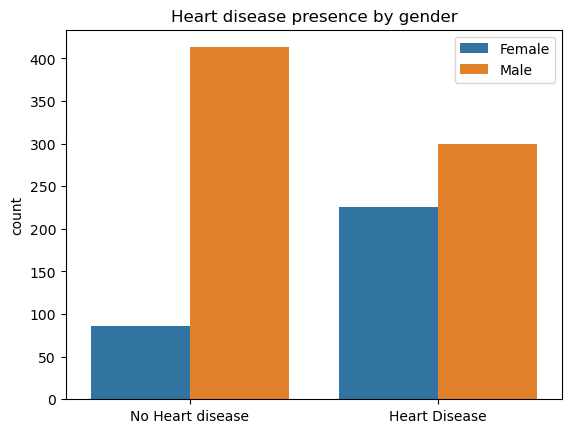

In [12]:
x = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
x.set_title("Heart disease presence by gender")
x.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

According to the plot Male have a higher risk of getting the heart disease than female.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of thal by presence of Target</p>


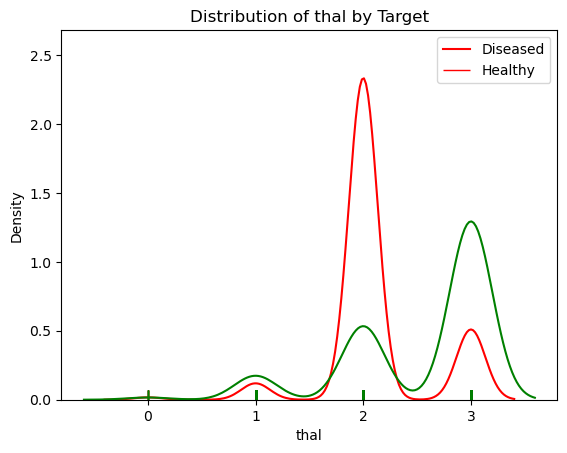

In [13]:
sns.distplot(disease[['thal']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['thal']], hist=False, color='green', rug=True)
plt.xlabel('thal')
plt.title('Distribution of thal by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

According to the plot we can see that diseased people have high distributin in thal.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of Cp by presence of Target</p>


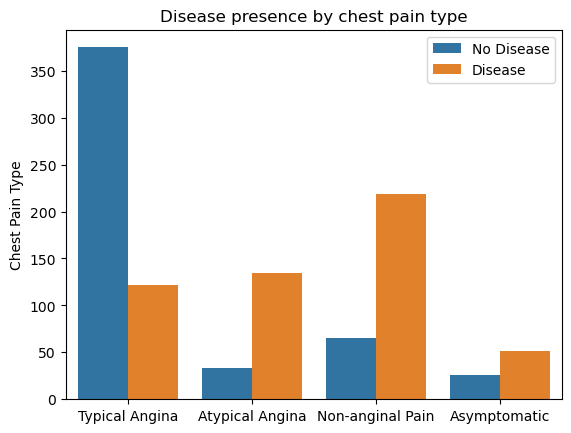

In [14]:
x = sns.countplot(x='cp', data=df, hue='target')
x.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
x.set_title('Disease presence by chest pain type')
plt.ylabel('Chest Pain Type')
plt.xlabel('')
plt.legend(['No Disease', 'Disease']);

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of fbs by presence of Target</p>


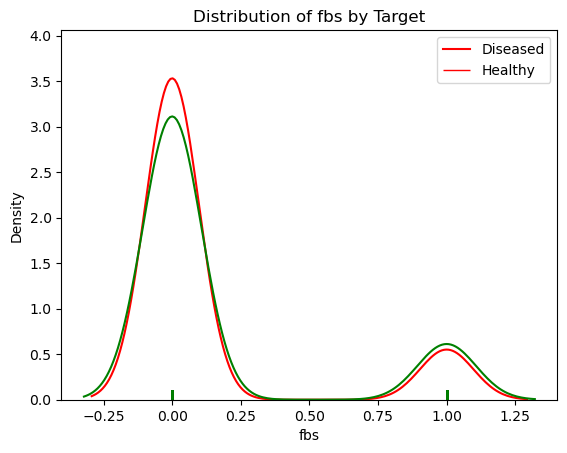

In [15]:
sns.distplot(disease[['fbs']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['fbs']], hist=False, color='green', rug=True)
plt.xlabel('fbs')
plt.title('Distribution of fbs by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

We can see that there is a slight difference between the Diseased and the Healthy People.

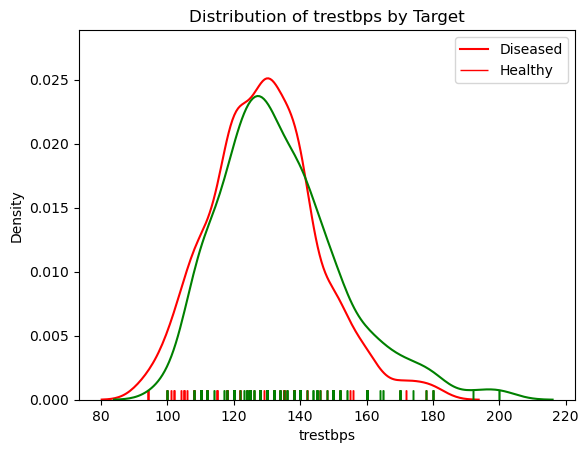

In [16]:
sns.distplot(disease[['trestbps']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['trestbps']], hist=False, color='green', rug=True)
plt.xlabel('trestbps')
plt.title('Distribution of trestbps by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

There is not much difference in trestbps, but the diseased people have a higher distribution than the Healthy people.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of restecg by presence of Target</p>


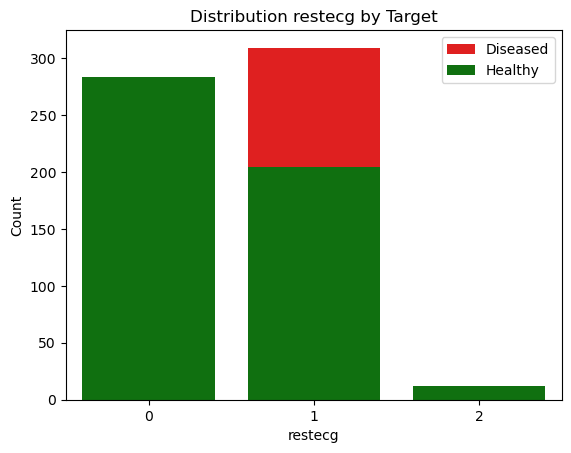

In [17]:
sns.countplot(disease['restecg'], color='red')
sns.countplot(non_disease['restecg'], color='green')
plt.xlabel("restecg")
plt.ylabel("Count")
plt.title("Distribution restecg by Target")
plt.legend(['Diseased','Healthy'])
plt.show()

The people who are healthy have a higher distribution in the restecg.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of thalach by presence of Target</p>


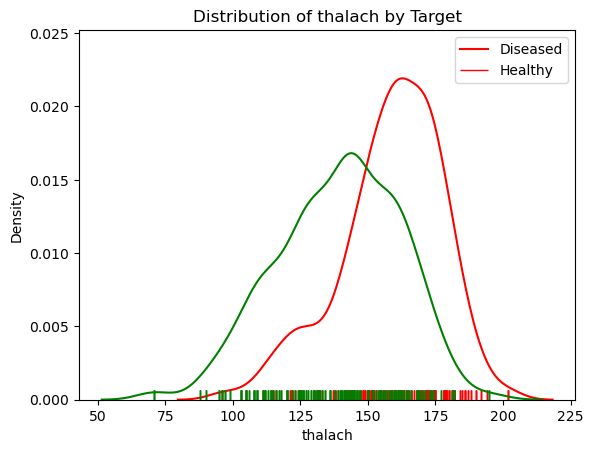

In [18]:
sns.distplot(disease[['thalach']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['thalach']], hist=False, color='green', rug=True)
plt.xlabel('thalach')
plt.title('Distribution of thalach by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

The Diseased people has a more distribution than the Healthy people.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of exang by presence of Target</p>


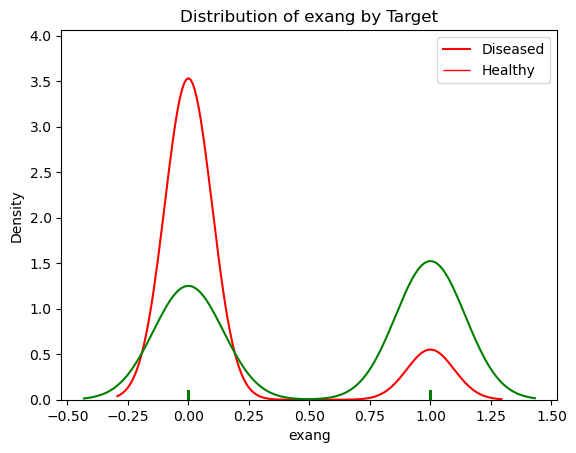

In [19]:
sns.distplot(disease[['exang']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['exang']], hist=False, color='green', rug=True)
plt.xlabel('exang')
plt.title('Distribution of exang by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

Here, we can see that there is a high rate of distribution in the Diseased poeple when compared with the healthy poeple.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of Oldpeak by presence of Target</p>


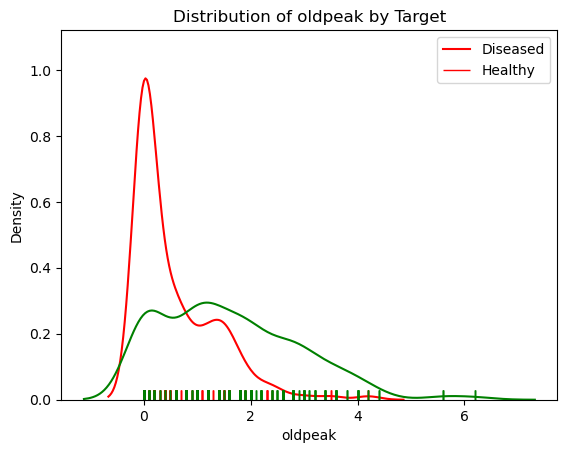

In [20]:
sns.distplot(disease[['oldpeak']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['oldpeak']], hist=False, color='green', rug=True)
plt.xlabel('oldpeak')
plt.title('Distribution of oldpeak by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

Here we can see that first there is a higher distribution for diseased people later it is coming back to the normal.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of Slope by presence of Target</p>


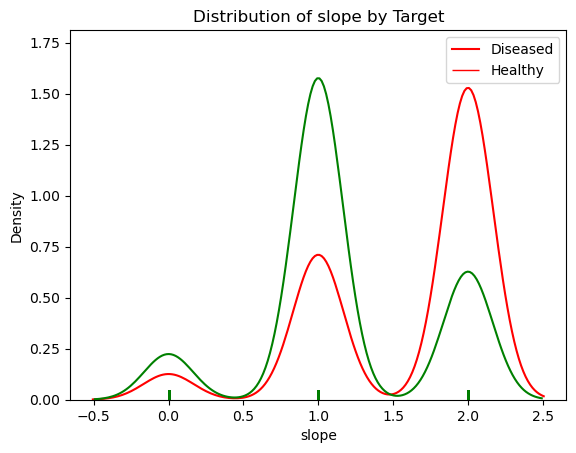

In [21]:
sns.distplot(disease[['slope']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['slope']], hist=False, color='green', rug=True)
plt.xlabel('slope')
plt.title('Distribution of slope by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

Here we can see that Healthy people  to have a higher distribution.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Distribution of ca by presence of Target</p>


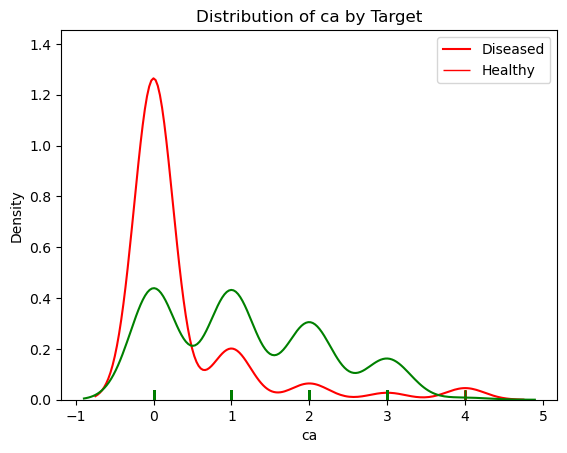

In [22]:
sns.distplot(disease[['ca']], hist=False, color='red', rug=True)
sns.distplot(non_disease[['ca']], hist=False, color='green', rug=True)
plt.xlabel('ca')
plt.title('Distribution of ca by Target')
plt.legend(['Diseased', 'Healthy'])
plt.show()

According to the plot there is higher distribution of Diseased people than the Healthy people.

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">BoxPlot</p>

<AxesSubplot:title={'center':'age'}, xlabel='target'>

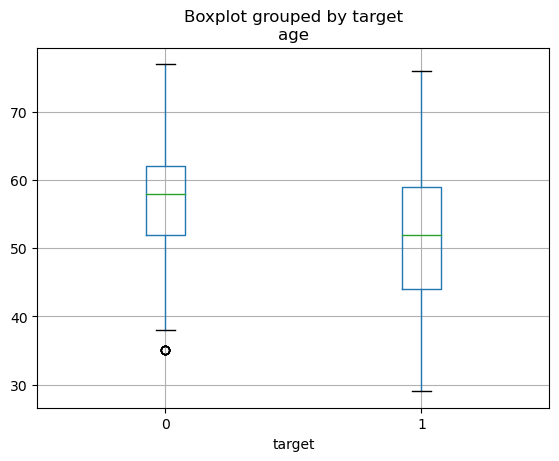

In [61]:
df.boxplot(column='age', by='target')

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Heatmap of Correlation based on the Features</p>


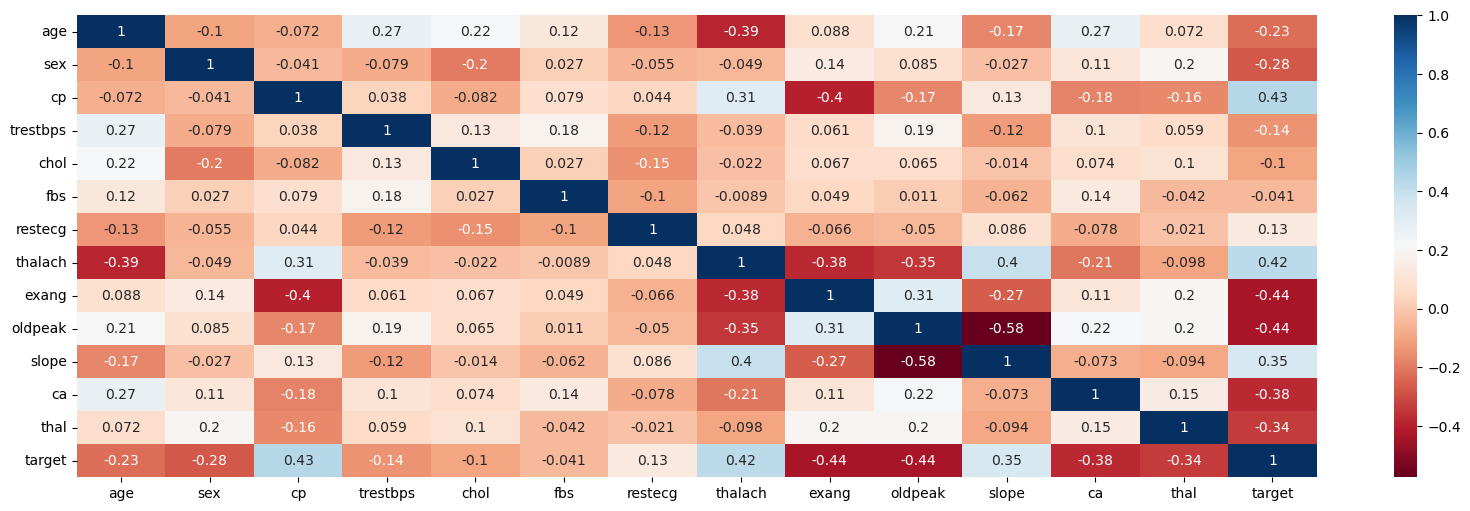

In [59]:
plt.figure(figsize=[20,6])
sns.heatmap(df.corr(), annot = True, cmap='RdBu')
plt.show()

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Prediction Models</p>


We will do the prediction model using the Logistic regression, Decision tree, Random Forest Classifier with all the features and then comparsion between the accuracies 

**Train Test split**

In [23]:
from sklearn.model_selection import train_test_split
y = df["target"]
x = df.drop('target',axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 0)


# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Logistic Regression</p>


In [24]:

regression=LogisticRegression()
model = regression.fit(x_train, y_train)
y_predict = regression.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_predict)
lr_acc_score = accuracy_score(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[117  28]
 [ 13 150]]


In [25]:
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 86.68831168831169 



In [26]:
lr_precision = precision_score(y_test, y_predict)
lr_precision

0.8426966292134831

In [27]:
lr_recall=recall_score(y_test, y_predict)
lr_recall

0.9202453987730062

In [28]:
lr_f1=f1_score(y_test,y_predict)
lr_f1

0.8797653958944281

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Decision Tree Classifier</p>


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
model=dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)
conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[138   7]
 [ 18 145]]


In [30]:
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')

Accuracy of DecisionTreeClassifier: 91.88311688311688 



In [31]:
dt_precision = precision_score(y_test, dt_predict)
dt_precision

0.9539473684210527

In [32]:
dt_recall=recall_score(y_test, dt_predict)
dt_recall

0.8895705521472392

In [33]:
dt_f1=f1_score(y_test,dt_predict)
dt_f1

0.9206349206349206

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Random Forest Classifier</p>


In [34]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(conf_matrix)


confusion matrix
[[130  15]
 [  5 158]]


In [35]:
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')


Accuracy of Random Forest: 93.5064935064935 



In [36]:
rf_precision = precision_score(y_test, rf_predicted)
rf_precision

0.9132947976878613

In [37]:
rf_recall=recall_score(y_test, rf_predicted)
rf_recall

0.9693251533742331

In [38]:
rf_f1=f1_score(y_test,rf_predicted)
rf_f1

0.9404761904761904

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">KNN Algorithm</p>


In [39]:
import math
math.sqrt(len(y_test))

17.549928774784245

In [40]:
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [41]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [42]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[129  16]
 [ 14 149]]


In [43]:
knn_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of KNN:",knn_accuracy*100)

Accuracy of KNN: 90.25974025974025


In [44]:
knn_precision = precision_score(y_test, y_pred)
knn_precision

0.9030303030303031

In [45]:
knn_recall=recall_score(y_test, y_pred)
knn_recall

0.9141104294478528

In [46]:
knn_f1=f1_score(y_test,y_pred)
knn_f1

0.9085365853658537

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">ADA Boost</p>

In [47]:
aboost = AdaBoostClassifier(random_state=1)
model=aboost.fit(x_train,y_train)
y_pred = aboost.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[127,  18],
       [ 14, 149]])

In [48]:
adaboost_accuracy =accuracy_score(y_test, y_pred)
adaboost_accuracy

0.8961038961038961

In [49]:
adaboost_precision = precision_score(y_test, y_pred)
adaboost_precision

0.8922155688622755

In [50]:
adaboost_recall=recall_score(y_test, y_pred)
adaboost_recall

0.9141104294478528

In [51]:
adaboost_f1=f1_score(y_test,y_pred)
adaboost_f1

0.9030303030303031

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Gradient Boosting Classifier</p>

In [52]:
gboost = GradientBoostingClassifier(random_state=1)
model= gboost.fit(x_train, y_train)
y_pred = gboost.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[140,   5],
       [  2, 161]])

In [53]:
gboost_accuracy = accuracy_score(y_test, y_pred)
gboost_accuracy

0.9772727272727273

In [54]:
gboost_precision = precision_score(y_test, y_pred)
gboost_precision

0.9698795180722891

In [55]:
gboost_recall=recall_score(y_test, y_pred)
gboost_recall

0.9877300613496932

In [56]:
gboost_f1=f1_score(y_test,y_pred)
gboost_f1

0.9787234042553191

# <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Summary</p>

In [58]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression',
                    'Decision Tree','Random Forest','KNN Algorithm','ADA Boost','Gradient Boosting'], 'Accuracy': [lr_acc_score*100,
                    dt_acc_score*100,rf_acc_score*100,knn_accuracy*100,adaboost_accuracy*100,gboost_accuracy*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.688312
1,Decision Tree,91.883117
2,Random Forest,93.506494
3,KNN Algorithm,90.259740
4,ADA Boost,89.610390
5,Gradient Boosting,97.727273


## Conclusion

The main contribution of this project is to implement the algorithms on heart disease patients dataset from Kaggle to observe the metrics - accuracy,precision,recall and f1 for each of the algorithms on the dataset. 

Analyzing the metric of the algorithms will give us a brief idea about the relationship of the machine learning algorithms and the data dimensionality. All the algorithms are developed in python. Upon metrics observation, the comparison can be built among logistic regression, decision tree, random forest,KNN algorithm,ADA Boost, Gradient Boost Classifier. All these algorithms in machine learning have been showing their powerful impacts on the classification of data in various sectors.

After importing the data, we preprocessed it by cleaning it, splitting into training and testing datasets.
According to the final model result analysis , the Gradient Boost algorithm provides a better performance than the other algorithms.
Hence it is the best fit for this dataset.